# Introduction

This notebook is focused on getting a feel for the Perceptron.  This is similar information to the very nice [webpage](http://sebastianraschka.com/Articles/2015_singlelayer_neurons.html) by Sebastian Raschka, which has very good graphics. He covers all this material much better there, although his code is Python instead of Julia.  As with the other notebooks in this series, I hope it helps people get a better feel for using the [Julia](http://julialang.org/) programming language.

This notebook was originally designed as an adjunct to a [talk I gave](https://www.meetup.com/Monterey-Bay-Data-Science-Meetup/events/241814181/) at CSUMB introducing neural networks.

# Perceptron 

The **Perceptron** is the basic building block of a neural network, first described by Frank Rosenblatt in his 1957 paper, *The Perceptron--a perceiving and recognizing automaton*. 

We will use it to linearly separate categories of flowers from the famous Iris dataset, based on the variables petal length and petal width.


## Get the data

Those with an R background are likely familiar with the Iris dataset.  Several popular R datasets are available in Julia through the `RDatasets` library.  To use dataframes in Julia, we have to import the library.

In [2]:
using DataFrames;
using RDatasets;
iris = dataset("datasets", "iris")

INFO: Recompiling stale cache file /home/milton/.julia/lib/v0.6/GZip.ji for module GZip.
INFO: Recompiling stale cache file /home/milton/.julia/lib/v0.6/DataFrames.ji for module DataFrames.
INFO: Recompiling stale cache file /home/milton/.julia/lib/v0.6/RData.ji for module RData.


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


## Peek at data

In [3]:
size(iris)

(150, 5)

In [4]:
# the `by` function allows examining a dataframe by a category variable
by(iris, :Species, nrow)

,Species,x1
1,setosa,50
2,versicolor,50
3,virginica,50


In [5]:
# Julia uses `describe` to get a summary of basic statistics
describe(iris)

SepalLength
Summary Stats:
Mean:           5.843333
Minimum:        4.300000
1st Quartile:   5.100000
Median:         5.800000
3rd Quartile:   6.400000
Maximum:        7.900000
Length:         150
Type:           Float64
Number Missing: 0
% Missing:      0.000000

SepalWidth
Summary Stats:
Mean:           3.057333
Minimum:        2.000000
1st Quartile:   2.800000
Median:         3.000000
3rd Quartile:   3.300000
Maximum:        4.400000
Length:         150
Type:           Float64
Number Missing: 0
% Missing:      0.000000

PetalLength
Summary Stats:
Mean:           3.758000
Minimum:        1.000000
1st Quartile:   1.600000
Median:         4.350000
3rd Quartile:   5.100000
Maximum:        6.900000
Length:         150
Type:           Float64
Number Missing: 0
% Missing:      0.000000

PetalWidth
Summary Stats:
Mean:           1.199333
Minimum:        0.100000
1st Quartile:   0.300000
Median:         1.300000
3rd Quartile:   1.800000
Maximum:        2.500000
Length:         150
Type:     

In [6]:
# load plotting libraries
using Plots
using StatPlots
pyplot()

INFO: Recompiling stale cache file /home/milton/.julia/lib/v0.6/StaticArrays.ji for module StaticArrays.
INFO: Recompiling stale cache file /home/milton/.julia/lib/v0.6/RecipesBase.ji for module RecipesBase.
INFO: Recompiling stale cache file /home/milton/.julia/lib/v0.6/PlotUtils.ji for module PlotUtils.
INFO: Recompiling stale cache file /home/milton/.julia/lib/v0.6/PlotThemes.ji for module PlotThemes.
INFO: Recompiling stale cache file /home/milton/.julia/lib/v0.6/Showoff.ji for module Showoff.
INFO: Recompiling stale cache file /home/milton/.julia/lib/v0.6/NaNMath.ji for module NaNMath.
INFO: Recompiling stale cache file /home/milton/.julia/lib/v0.6/Distributions.ji for module Distributions.
INFO: Precompiling module IterableTables.
INFO: Precompiling module DataValues.
INFO: Recompiling stale cache file /home/milton/.julia/lib/v0.6/KernelDensity.ji for module KernelDensity.
  likely near /home/milton/.julia/v0.6/KernelDensity/src/univariate.jl:80
INFO: Recompiling stale cache file

Plots.PyPlotBackend()


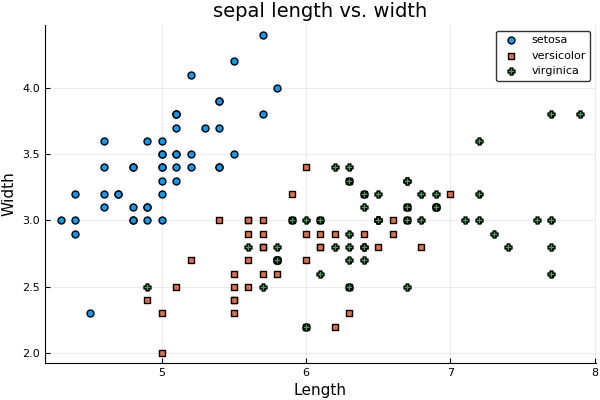

In [8]:
scatter(iris, :SepalLength, :SepalWidth, group=:Species, title = "sepal length vs. width", 
xlabel = "Length", ylabel = "Width", marker=([:circle :rect :cross], 5))

So, there are 150 data points, with 50 of each species.  Using a perceptron, we are going to try to find the linear separation between setosa and non-setosa, using sepal length and sepal width.  

## The equations

![Perceptron](http://sebastianraschka.com/images/blog/2015/singlelayer_neural_networks_files/perceptron_schematic.png) Image by Sebastian Raschka from his [article](http://sebastianraschka.com/Articles/2015_singlelayer_neurons.html) as mentioned above.  

For all $N$ dimensions $i$,

$$\quad\mathbf{w} ^\intercal \mathbf{x}= \sum_{i=1}^N w_ix_i + w_0$$

where $x$ is the input data and $w$ is the weight with $w_0$ as a bias term that is not multiplied by an input.

Squash output for each sample j,
$$\quad y_j = \begin{cases}\;1  \text{ if} \; \mathbf{w} ^\intercal \mathbf{x} \ge 0 \\
-1  \text{ otherwise} \end{cases}$$

update weights ($w_j$) for data at $j$,
$$\quad \Delta w_j = \eta \,(target^{(j)} - output^{(j)}) \,x_i^{(j)}$$

$\eta$ is the learning rate in the range 0 to 1.  target is the desired output, and output is $y_j$ calculated above.

In a two dimensional case,
$$\quad \Delta w_0 = \eta \,(target^{(j)} - output^{(j)})$$
$$\quad \Delta w_1 = \eta \,(target^{(j)} - output^{(j)})\,x_1^{(j)}$$
$$\quad \Delta w_2 = \eta \,(target^{(j)} - output^{(j)})\,x_2^{(j)}$$

Output and targets are always either 1 or -1, so weight update is 0 if they are the same, and $2\,\eta$ or $-2\,\eta$ if they are different.

### implementation
We will implement the algorithm step by step to see what the data looks like, then implement it in a loop to see how many iterations it takes to converge.

In [9]:
# create targets
@time target = [s=="setosa" ? 1 : -1 for s in iris[:Species]]

  0.047499 seconds (12.97 k allocations: 714.144 KiB)


150-element Array{Int64,1}:
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  ⋮
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1

For our data, we have two inputs corresponding to $x_1$ and $x_2$ in the equations above (sepal length and sepal width).  To create our data input array, we add a third column of 1's for the bias corresponding to $x_0$ above.

In [10]:
# append a third column of 1's for the bias
@time X = hcat(iris[:SepalLength], iris[:SepalWidth],ones(150))

  0.421806 seconds (203.30 k allocations: 10.826 MiB)


150×3 DataArrays.DataArray{Float64,2}:
 5.1  3.5  1.0
 4.9  3.0  1.0
 4.7  3.2  1.0
 4.6  3.1  1.0
 5.0  3.6  1.0
 5.4  3.9  1.0
 4.6  3.4  1.0
 5.0  3.4  1.0
 4.4  2.9  1.0
 4.9  3.1  1.0
 5.4  3.7  1.0
 4.8  3.4  1.0
 4.8  3.0  1.0
 ⋮            
 6.0  3.0  1.0
 6.9  3.1  1.0
 6.7  3.1  1.0
 6.9  3.1  1.0
 5.8  2.7  1.0
 6.8  3.2  1.0
 6.7  3.3  1.0
 6.7  3.0  1.0
 6.3  2.5  1.0
 6.5  3.0  1.0
 6.2  3.4  1.0
 5.9  3.0  1.0

In [11]:
# initialize w as small random numbers
@time w = rand(3)-0.5

  0.086896 seconds (32.31 k allocations: 1.602 MiB)


3-element Array{Float64,1}:
 -0.067318
  0.420089
 -0.489034

In [12]:
# calculate output (predicted y)
@time output = [o >= 0 ? 1 : -1 for o in X*w]

  0.249502 seconds (96.60 k allocations: 5.044 MiB, 5.07% gc time)


150-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

If you look at the equations, $\Delta w_0$ is simply multiplied by each of the members of our input X to get the weight changes.

In [13]:
# calculate delta w0
η = 0.1
@time delta = η*(target.-output)


  0.124499 seconds (65.28 k allocations: 3.223 MiB)


150-element Array{Float64,1}:
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  ⋮  
 -0.2
 -0.2
 -0.2
 -0.2
 -0.2
 -0.2
 -0.2
 -0.2
 -0.2
 -0.2
 -0.2
 -0.2

In [14]:
error = count(x->x!=0, delta)/150

0.6666666666666666

In [15]:
@time cumsum(X.*delta)[end,:]

  1.606332 seconds (862.28 k allocations: 44.997 MiB, 1.58% gc time)


3-element DataArrays.DataArray{Float64,1}:
 -125.24
  -57.44
  -20.0 

In [16]:
@time [sum(convert(Array,X.*delta)[:,i]) for i in 1:3]

  0.113084 seconds (29.48 k allocations: 1.617 MiB)


3-element Array{Float64,1}:
 -125.24
  -57.44
  -20.0 

In [17]:
# put into loop and save weights and errors for plotting, η = 0.1
epochs = 30
w = rand(3)-0.5
η = .1
errors = Float64[]
weights = Array{Float64}(epochs,3)
for i in 1:epochs
    output = [o >= 0 ? 1 : -1 for o in X*w]
    delta = η*(target.-output)
    w += cumsum(X.*delta)[end,:]
    weights[i,:] = w
    push!(errors, count(x->x!=0, delta)/150)
end
errors

30-element Array{Float64,1}:
 0.333333  
 0.666667  
 0.333333  
 0.333333  
 0.666667  
 0.333333  
 0.333333  
 0.666667  
 0.333333  
 0.333333  
 0.66      
 0.333333  
 0.333333  
 ⋮         
 0.0133333 
 0.00666667
 0.02      
 0.00666667
 0.0133333 
 0.00666667
 0.02      
 0.00666667
 0.0133333 
 0.0133333 
 0.00666667
 0.02      

In [18]:
errors[10:15]

6-element Array{Float64,1}:
 0.333333  
 0.66      
 0.333333  
 0.333333  
 0.00666667
 0.00666667

In [19]:
weights

30×3 Array{Float64,2}:
   49.8816     33.8625   10.4532  
  -75.3584    -23.5775   -9.54682 
  -25.2984     10.7025    0.453184
   24.7616     44.9825   10.4532  
 -100.478     -12.4575   -9.54682 
  -50.4184     21.8225    0.453184
   -0.358396   56.1025   10.4532  
 -125.598      -1.33748  -9.54682 
  -75.5384     32.9425    0.453184
  -25.4784     67.2225   10.4532  
 -149.178      10.3025   -9.34682 
  -99.1184     44.5825    0.653184
  -49.0584     78.8625   10.6532  
    ⋮                             
  -47.1384     79.6625   11.2532  
  -46.2384     80.1225   11.4532  
  -47.6184     79.3025   11.2532  
  -46.7184     79.7625   11.4532  
  -47.0184     79.5425   11.4532  
  -46.1184     80.0025   11.6532  
  -47.4984     79.1825   11.4532  
  -46.5984     79.6425   11.6532  
  -46.8984     79.4225   11.6532  
  -47.1984     79.2025   11.6532  
  -46.2984     79.6625   11.8532  
  -47.6784     78.8425   11.6532  

If we plot the errors we saved above, we see that it jumps up and down between 1/3 and 2/3 until epoch 14 when it drops below 0.01.


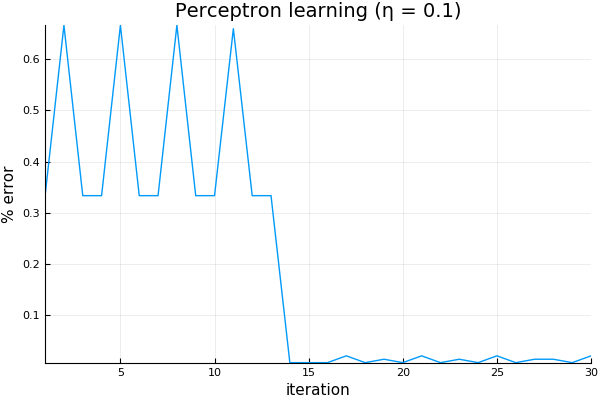

In [21]:
plot(errors, xlabel="iteration", ylabel="% error", legend=:none, 
title="Perceptron learning (η = $η)")

Let's see what happens when we make the learning rate smaller.

In [22]:
# loop η = .01
epochs = 40
w = rand(3)-0.5
η = .01
errors = Float64[]
for i in 1:epochs
    output = [o >= 0 ? 1 : -1 for o in X*w]
    delta = η*(target.-output)
    w += cumsum(X.*delta)[end,:]
    push!(errors, count(x->x!=0, delta)/150)
end
errors

40-element Array{Float64,1}:
 0.333333  
 0.666667  
 0.333333  
 0.333333  
 0.666667  
 0.333333  
 0.333333  
 0.666667  
 0.333333  
 0.333333  
 0.626667  
 0.333333  
 0.333333  
 ⋮         
 0.0133333 
 0.00666667
 0.0133333 
 0.0133333 
 0.0133333 
 0.00666667
 0.0133333 
 0.0133333 
 0.0133333 
 0.00666667
 0.0133333 
 0.0133333 

As we might expect, it takes longer to drop to find a set of solutions with lower error - maybe 25 epochs of training.


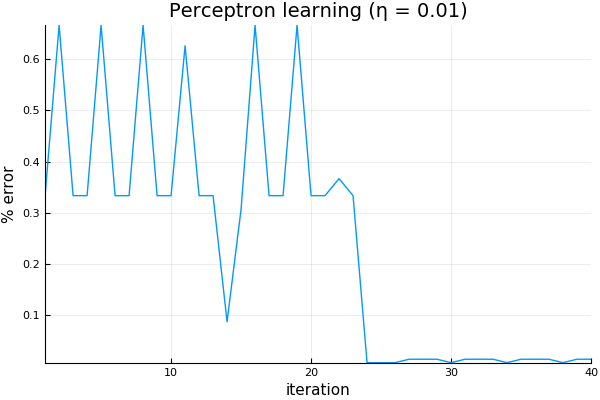

In [24]:
plot(errors, xlabel="iteration", ylabel="% error", legend=:none, 
title="Perceptron learning (η = $η)")

### Identify decision boundary

To visualize the solutions that we come up with, let's plot the decision boundary.  If we are plotting sepal length vs sepal width, we can find out what line would be generated by the weights we calculated using the formula:

$ x_2 = \frac{-w_1}{w_2} x_1 - \frac{w_0}{w_2}$

since we are looking for the place where 

$ w_2 x_2 + w_1 x_1 + w_0 = 0$


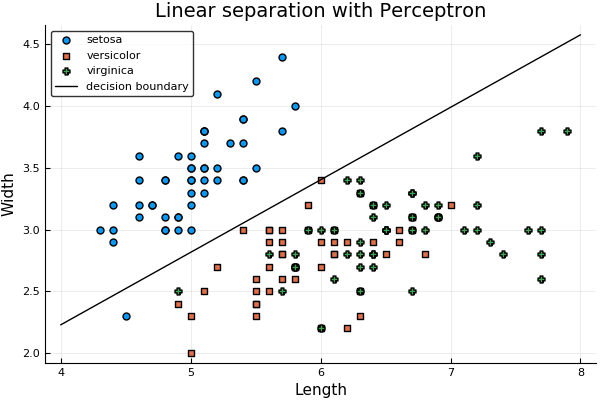

In [25]:
# in Julia, plot! modifies a previous plot
scatter(iris, :SepalLength, :SepalWidth, group=:Species, title = "Linear separation with Perceptron", 
xlabel = "Length", ylabel = "Width", marker=([:circle :rect :cross], 5))
x=linspace(4,8,50)
y= (-w[1]*x-w[3])/w[2]
plot!(x,y, linecolor=:black, label="decision boundary")

The line above was calculated with the weights we got at the end of all iterations.  If we plot a few other lines from our saved weights (iterations =5, =10, =15 and =20), we can get a feel for how the solutions evolve in the learning process.  Note that when iterations = 5, the line doesn't show up in the plot below because it is not even in the chosen x and y limits.


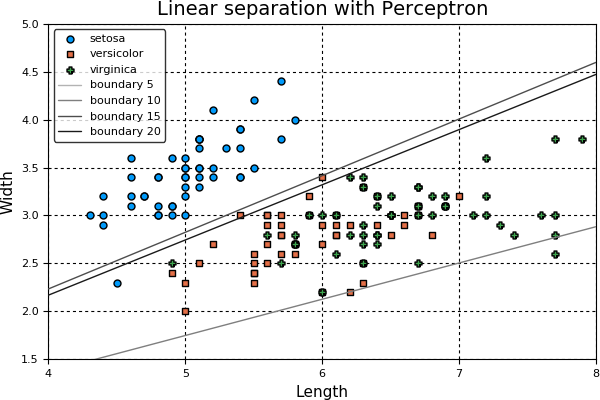

In [21]:
# draw boundaries at different numbers of iterations (note #5 isn't even in the plot frame)
xmin=4
xmax=8
ymin=1.5
ymax=5
scatter(iris, :SepalLength, :SepalWidth, group=:Species, title = "Linear separation with Perceptron", 
xlabel = "Length", ylabel = "Width", marker=([:circle :rect :cross], 5), xlims=(xmin,xmax), 
ylims=(ymin,ymax))
x=linspace(xmin,xmax,50)
i=5
y= (-weights[i,1]*x-weights[i,3])/weights[i,2]
plot!(x,y, linecolor=[:gray70, :gray50, :gray30, :gray10, :gray1][fld(i,5)], 
label="boundary $i", xlims=(xmin,xmax), ylims=(ymin,ymax))
i=10
y= (-weights[i,1]*x-weights[i,3])/weights[i,2]
plot!(x,y, linecolor=[:gray70, :gray50, :gray30, :gray10, :gray1][fld(i,5)], 
label="boundary $i", xlims=(xmin,xmax), ylims=(ymin,ymax))
i=15
y= (-weights[i,1]*x-weights[i,3])/weights[i,2]
plot!(x,y, linecolor=[:gray70, :gray50, :gray30, :gray10, :gray1][fld(i,5)], 
label="boundary $i", xlims=(xmin,xmax), ylims=(ymin,ymax))
i=20
y= (-weights[i,1]*x-weights[i,3])/weights[i,2]
plot!(x,y, linecolor=[:gray70, :gray50, :gray30, :gray10, :gray1][fld(i,5)], 
label="boundary $i", xlims=(xmin,xmax), ylims=(ymin,ymax))


# Adaline

The **ADA**pative **LI**near **NE**uron, developed by Widrow and Hoff (1960), uses a **linear activation function** to provide a graded feedback compared to Rosenblatt's original perceptron.  The weights are changed using the rule:

update weights ($w_j$) for data at $j$,
$$\quad \Delta w_j = \eta \,(target^{(j)} - output^{(j)}) \,x_i^{(j)}$$

Unlike the perceptron, this output is the weighted sum *without* squashing.  It is derived from taking the partial derviative of the cost function:

$$\quad J(\mathbf{w}) = \frac{1}{2} \sum\limits_{j}( target^{(j)} - output^{(j)} )^2$$

so that the update is in the opposite direction of the gradient:

$$\quad \Delta \mathbf{w} = - \eta\,\nabla \, J(\mathbf{w})$$

Thus, the term *gradient descent* for minimizing the cost function.


In [22]:
# loop η = .01
# gradient doesn't descend if use an η like above (it explodes!)
epochs = 50
w = zeros(3)
η = .01
costs = Float64[]
weights = Array{Float64}(epochs,3)
for j in 1:epochs
    delta = η*(target.-(X*w))
    w += cumsum(X.*delta)[end,:]
    weights[j,:] = w
    cost = (sumabs2(target.-(X*w)))/2
    push!(costs, cost)
end
costs

50-element Array{Float64,1}:
 49937.6        
     2.20933e8  
     9.77975e11 
     4.32907e15 
     1.91629e19 
     8.48257e22 
     3.75486e26 
     1.66211e30 
     7.35744e33 
     3.25682e37 
     1.44165e41 
     6.38155e44 
     2.82483e48 
     ⋮          
     1.77306e143
     7.84855e146
     3.47421e150
     1.53788e154
     6.80752e157
     3.01339e161
     1.3339e165 
     5.90457e168
     2.6137e172 
     1.15697e176
     5.12139e179
     2.26702e183


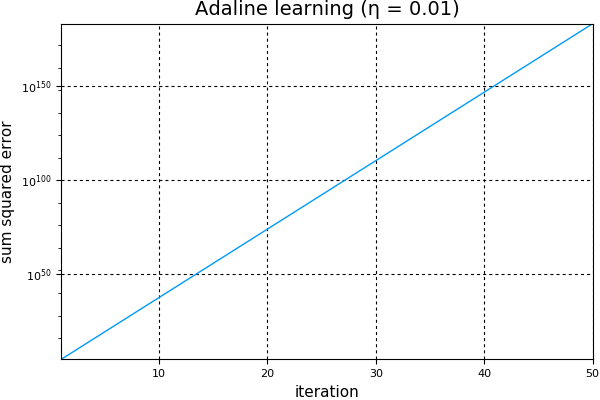

In [23]:
plot(costs, yscale=:log10, xlabel="iteration", ylabel="sum squared error", legend=:none, 
title="Adaline learning (η = $η)")

In [24]:
# loop η = .0001
# gradient change is slow if η too small
epochs = 50
w = zeros(3)
η = .0001
costs = Float64[]
weights = Array{Float64}(epochs,3)
for j in 1:epochs
    delta = η*(target.-(X*w))
    w += cumsum(X.*delta)[end,:]
    weights[j,:] = w
    cost = (sumabs2(target.-(X*w)))/2
    push!(costs, cost)
end
costs

50-element Array{Float64,1}:
 64.4224
 62.8731
 62.2799
 61.7917
 61.3188
 60.8517
 60.3893
 59.9315
 59.4783
 59.0296
 58.5853
 58.1454
 57.7099
  ⋮     
 47.7852
 47.4525
 47.1231
 46.7969
 46.474 
 46.1543
 45.8378
 45.5244
 45.2141
 44.9069
 44.6027
 44.3016


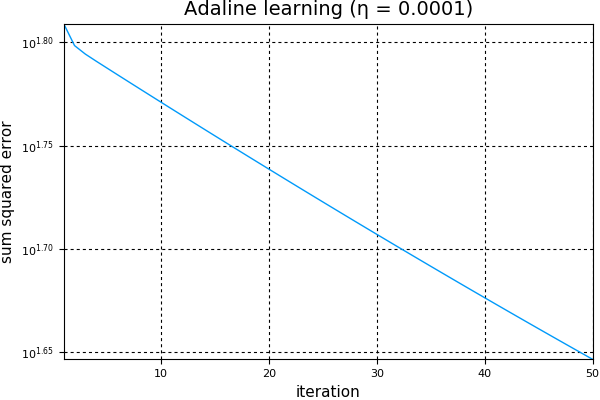

In [25]:
plot(costs, yscale=:log10, xlabel="iteration", ylabel="sum squared error", legend=:none, 
title="Adaline learning (η = $η)")

In [26]:
weights

50×3 Array{Float64,2}:
 -0.03759    -0.01158     -0.005      
 -0.0520095  -0.0112249   -0.00609918 
 -0.058895   -0.00701519  -0.00593429 
 -0.0633235  -0.00157442  -0.00536141 
 -0.0669434   0.00424576  -0.00465848 
 -0.0702899   0.0101689   -0.00391572 
 -0.0735369   0.0161055   -0.00316242 
 -0.0767408   0.0220264   -0.00240807 
 -0.0799201   0.0279223   -0.00165574 
 -0.0830807   0.0337903   -0.000906422
 -0.0862248   0.0396295   -0.000160421
 -0.0893529   0.0454399    0.000582174
 -0.0924653   0.0512213    0.00132135 
  ⋮                                   
 -0.168181    0.191839     0.0193871  
 -0.170902    0.196891     0.0200396  
 -0.173609    0.201918     0.0206892  
 -0.176303    0.20692      0.0213357  
 -0.178984    0.211897     0.0219793  
 -0.181651    0.21685      0.0226199  
 -0.184305    0.221777     0.0232576  
 -0.186946    0.22668      0.0238924  
 -0.189574    0.231559     0.0245242  
 -0.192188    0.236413     0.0251532  
 -0.19479     0.241243     0.0257793  
 -

We can start the process in a better range if we normalize the input data around zero.  This will help the process zero in faster.

In [27]:
# scale data
Xs = Array{Float64}(150,3)
for i in 1:2
    Xs[:,i] = convert(Array, X[:,i].-mean(X[:,i]))./std(X[:,i]);
end
Xs[:,3] = ones(150);

In [28]:
# loop with scaling data η = .001
epochs = 20
w = zeros(3)
η = .001
costs = Float64[]
weights = Array{Float64}(epochs,3)
for i in 1:epochs
    delta = η*(target.-(Xs*w))
    w += cumsum(Xs.*delta)[end,:]
    weights[i,:] = w
    cost = (sum(abs2,(target.-(Xs*w))))/2
    push!(costs, cost)
end
costs

20-element Array{Float64,1}:
 56.6816
 43.8844
 34.9424
 28.6928
 24.3239
 21.269 
 19.1324
 17.6376
 16.5916
 15.8594
 15.3468
 14.9877
 14.7361
 14.5598
 14.4362
 14.3495
 14.2887
 14.2461
 14.2161
 14.195 


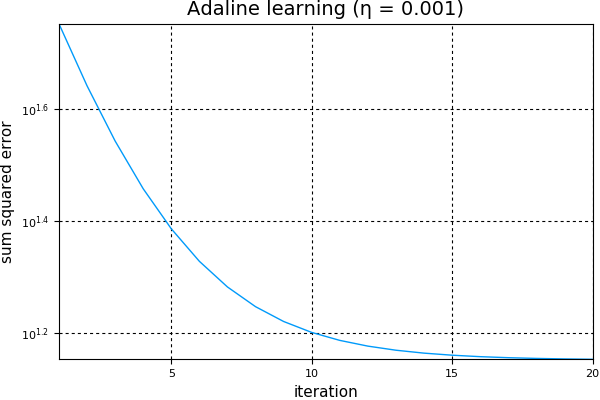

In [29]:
plot(costs, yscale=:log10, xlabel="iteration", ylabel="sum squared error", legend=:none, 
title="Adaline learning (η = $η)")

In [30]:
# loop with scaling data η = .01
epochs = 20
w = zeros(3)
η = .01
costs = Float64[]
weights = Array{Float64}(epochs,3)
for i in 1:epochs
    delta = η*(target.-(Xs*w))
    w += cumsum(Xs.*delta)[end,:]
    weights[i,:] = w
    cost = (sum(abs2,(target.-(Xs*w))))/2
    push!(costs, cost)
end
costs

20-element Array{Float64,1}:
 39.2985
 24.8569
 18.7828
 16.1719
 15.0356
 14.5376
 14.3184
 14.2217
 14.179 
 14.1601
 14.1517
 14.148 
 14.1464
 14.1457
 14.1454
 14.1452
 14.1452
 14.1451
 14.1451
 14.1451


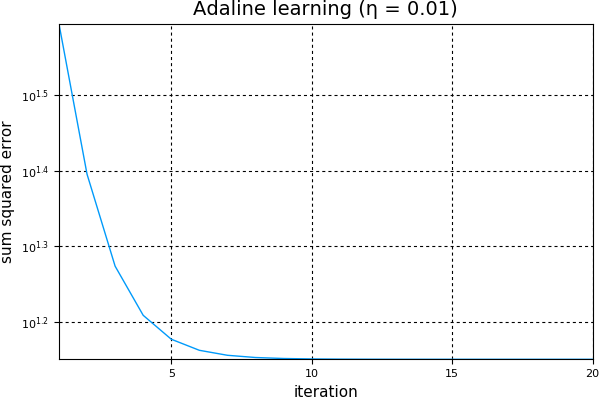

In [31]:
plot(costs, yscale=:log10, xlabel="iteration", ylabel="sum squared error", legend=:none, 
title="Adaline learning (η = $η)")


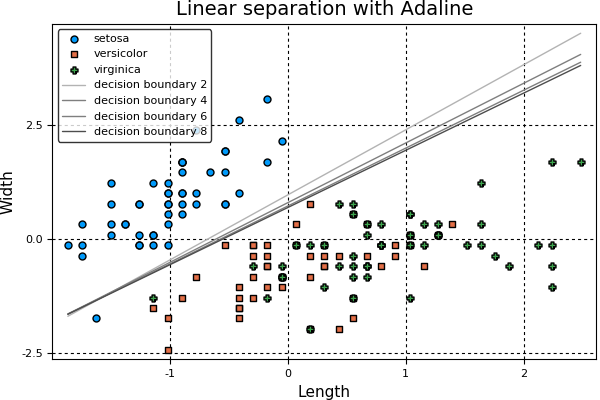

In [32]:
scatter(Xs[:,1],Xs[:,2], group=iris[:Species], title = "Linear separation with Adaline", 
xlabel = "Length", ylabel = "Width", marker=([:circle :rect :cross], 5))

x=linspace(minimum(Xs[:,1]),maximum(Xs[:,1]),50)
i=2
y= (-weights[i,1]*x-weights[i,3])/weights[i,2]
plot!(x,y, linecolor=[:gray70, :gray50, :gray30, :gray10, :gray1][fld(i,4)+1], 
label="decision boundary $i")
i=4
y= (-weights[i,1]*x-weights[i,3])/weights[i,2]
plot!(x,y, linecolor=[:gray70, :gray50, :gray30, :gray10, :gray1][fld(i,4)+1], 
label="decision boundary $i")
i=6
y= (-weights[i,1]*x-weights[i,3])/weights[i,2]
plot!(x,y, linecolor=[:gray70, :gray50, :gray30, :gray10, :gray1][fld(i,4)+1], 
label="decision boundary $i")
i=8
y= (-weights[i,1]*x-weights[i,3])/weights[i,2]
plot!(x,y, linecolor=[:gray70, :gray50, :gray30, :gray10, :gray1][fld(i,4)+1], 
label="decision boundary $i")

In [33]:
weights

20×3 Array{Float64,2}:
 -1.01119   0.850414  -0.5     
 -0.366733  0.256572  -0.25    
 -0.786546  0.66045   -0.375   
 -0.510087  0.389007  -0.3125  
 -0.693103  0.570444  -0.34375 
 -0.571641  0.449479  -0.328125
 -0.652348  0.530029  -0.335937
 -0.598691  0.476422  -0.332031
 -0.634374  0.512089  -0.333984
 -0.610641  0.488361  -0.333008
 -0.626427  0.504145  -0.333496
 -0.615927  0.493646  -0.333252
 -0.622911  0.50063   -0.333374
 -0.618265  0.495984  -0.333313
 -0.621355  0.499074  -0.333344
 -0.6193    0.497019  -0.333328
 -0.620667  0.498386  -0.333336
 -0.619758  0.497477  -0.333332
 -0.620363  0.498082  -0.333334
 -0.61996   0.497679  -0.333333


[<img style="float: left;" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png">](http://creativecommons.org/licenses/by-sa/4.0/)  

Licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).